In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.5 MB/s eta 0:00:00


In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 54.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 71.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 27.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.1-py3-none-any.whl size=25313921 sha256

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [5]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2018_rahip_brunson/train.csv')

In [6]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,"gold settles higher recent downdraft, inflatio...",0.283333,0.116667,Positive
1,1,gloves wedding lace ivory bridalgown weddingdr...,0.600000,0.500000,Positive
2,2,boston happening tomorrow _music!! tickets now...,0.602273,-0.306818,Negative
3,3,"第一商品金地金参考価格(1kg税込) 8:45現在 販売 4,784,000円 買取 4,7...",0.000000,0.000000,Neutral
4,4,"gold gains 1 percent dollar retreat, short-cov...",0.000000,0.000000,Neutral


In [7]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2018_rahip_brunson/test.csv')

In [8]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,40000,✅awax - finacial blockchain 💰💰💰 innovative wid...,0.666667,0.066667,Positive
1,40001,juuusssttt hair center (say like bob uecker ma...,0.255556,-0.068056,Negative
2,40002,"los videojuegos son vicio caro, asíque os trae...",0.750000,0.375000,Positive
3,40003,cryptocurrency price analysis bitsend bsd : ⬇️...,0.677273,-0.331818,Negative
4,40004,god trust pay cash! deadpresidents cash coin,0.000000,0.000000,Neutral


In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [10]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [11]:
len(X_train), len(X_test)

(40000, 5600)

In [12]:
# Building model with transformer
model_name = 'roberta-base'

trans = text.Transformer(model_name, maxlen=128)

In [13]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 33
	99percentile : 46


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 16
	95percentile : 34
	99percentile : 34


In [14]:
# getting roberta-base model.
model = trans.get_classifier() # AUC(name='auc') from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


In [15]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 8)

In [16]:

#history = learner.fit_onecycle(1e-5, 3)
history = learner.autofit(1e-5, 5)



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/5
5000/5000 [==============================] - 1295s 254ms/step - loss: 0.2253 - accuracy: 0.9125 - val_loss: 0.6957 - val_accuracy: 0.8225
Epoch 2/5
5000/5000 [==============================] - 1273s 253ms/step - loss: 0.0302 - accuracy: 0.9924 - val_loss: 0.6331 - val_accuracy: 0.8838
Epoch 3/5
5000/5000 [==============================] - 1274s 253ms/step - loss: 0.0174 - accuracy: 0.9953 - val_loss: 0.6734 - val_accuracy: 0.8534
Epoch 4/5
5000/5000 [==============================] - 1272s 253ms/step - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0.7686 - val_accuracy: 0.8673
Epoch 5/5
5000/5000 [==============================] - 1272s 253ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.7081 - val_accuracy: 0.8489


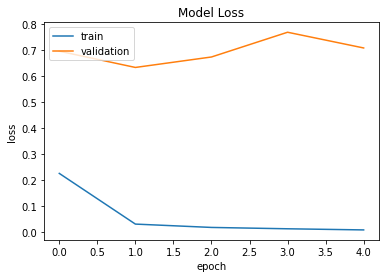

In [17]:
learner.plot('loss')

In [18]:
learner.validate()

175/175 [==============================] - 50s 269ms/step
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       736
           1       0.91      0.82      0.86      2650
           2       0.79      0.93      0.86      2214

    accuracy                           0.85      5600
   macro avg       0.85      0.82      0.83      5600
weighted avg       0.86      0.85      0.85      5600



array([[ 533,   90,  113],
       [  61, 2168,  421],
       [  43,  118, 2053]])

In [19]:
y_pred = predictor.predict(X_test)

NameError: ignored